# This Notebook is an example of Data Science applied to Industrial Data Analysis.

In this case, we'll analyse a Cooler Drum problem, given some input variables:

* Current of input conveyor belt;
* Current of Cooler Drum;
* Temperature of input material;
* Current of the Drum's reductor;
* Output flow through conveyor belt.

*This opportunity of study was given by Yara International.*

<div style="width:100%;text-align: center;">
<img src="http://static1.squarespace.com/static/5e6b8563380ccc4e4fd26a4f/t/5e9601c8e8579f209b6924f4/1586889770542/Yara_International.jpg?format=1500w" width="400px">
    <div class="caption">Yara International</div>

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import missingno as msno

# Mute warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/coolerdrumanalysis/ARQV-GERAL.csv',sep=";")

In [3]:
df.head()

,Date,Time,STATUS-RESF,RESF,TP-16-AMP,TP-16-FLOW,TEMP-PROD,VIB-RED
0,17/08/2021,00:00:22,OPERANDO,"50,66","4,25","82,63","77,93","8,77"
1,17/08/2021,00:00:24,OPERANDO,"52,61","4,42","82,67","77,87","11,53"
2,17/08/2021,00:00:27,OPERANDO,"51,62","4,59","82,26","77,93","6,63"
3,17/08/2021,00:00:30,OPERANDO,"50,65","4,34","82,62","77,8","10,79"
4,17/08/2021,00:00:33,OPERANDO,"52,26","4,25","82,4","77,87",10


Replacing commas for dots (standard for numerical operations)

In [4]:
df=df.apply(lambda x: x.str.replace(',','.'))

## Analysing the correlation between STATUS-RESF ( Status of the cooling drum ) with the other variables:

*STATUS-RESF HAS 2 VALUES: OPERANDO (OPERATING) AND FALHA(FAILURE)*

Transforming *STATUS-RESF* to categorical data.

In [5]:
df['STATUS-RESF'] = df['STATUS-RESF'].astype('category').cat.codes

Extracting only the interesting values:

In [6]:
df_values = df.drop(['Date','Time'],axis=1)

In [7]:
df_values

,STATUS-RESF,RESF,TP-16-AMP,TP-16-FLOW,TEMP-PROD,VIB-RED
0,1,50.66,4.25,82.63,77.93,8.77
1,1,52.61,4.42,82.67,77.87,11.53
2,1,51.62,4.59,82.26,77.93,6.63
3,1,50.65,4.34,82.62,77.8,10.79
4,1,52.26,4.25,82.4,77.87,10
...,...,...,...,...,...,...
43080,1,47.54,4.16,16.94,94.99,2.49
43081,1,46.53,4.08,16.04,94.92,2.15
43082,1,45.85,4.42,16.49,94.92,2.26
43083,1,47.81,4.34,17.52,94.92,2.18


Now, normalizing the numerical data to work as categorical:

In [8]:
x = df_values.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)

In [9]:
df_norm.head()

,0,1,2,3,4,5
0,1.0,0.470036,0.160377,0.539312,0.740315,0.514370
1,1.0,0.480433,0.240566,0.539585,0.739493,0.676246
2,1.0,0.475155,0.320755,0.536787,0.740315,0.388856
3,1.0,0.469983,0.202830,0.539244,0.738535,0.632845
4,1.0,0.478567,0.160377,0.537742,0.739493,0.586510


In [10]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43085 entries, 0 to 43084
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       43085 non-null  float64
 1   1       43085 non-null  float64
 2   2       43085 non-null  float64
 3   3       43085 non-null  float64
 4   4       43085 non-null  float64
 5   5       43085 non-null  float64
dtypes: float64(6)
memory usage: 2.0 MB


Renaming to better understanding:

In [11]:
df_norm.columns = ['STATUS-RESF','RESF','TP-16-AMP','TP-16-FLOW','TEMP-PROD','VIB-RED']

In [12]:
df_norm.head()

,STATUS-RESF,RESF,TP-16-AMP,TP-16-FLOW,TEMP-PROD,VIB-RED
0,1.0,0.470036,0.160377,0.539312,0.740315,0.514370
1,1.0,0.480433,0.240566,0.539585,0.739493,0.676246
2,1.0,0.475155,0.320755,0.536787,0.740315,0.388856
3,1.0,0.469983,0.202830,0.539244,0.738535,0.632845
4,1.0,0.478567,0.160377,0.537742,0.739493,0.586510


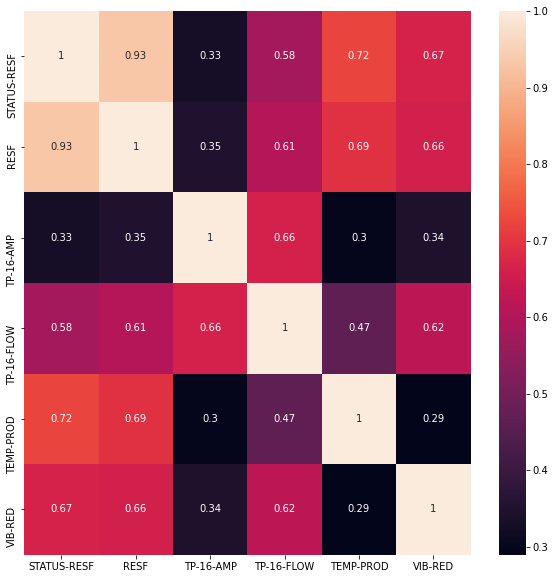

In [13]:
corrMatrix = df_norm.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Now, let's look closer to the rows before the failures:

First, we need to create a Index:

In [14]:
df_norm['IDX'] = range(1, len(df_norm) + 1)

In [15]:
consecutives = df_norm['STATUS-RESF'].diff().ne(0).cumsum()
df_norm.groupby(consecutives).agg(list)

,STATUS-RESF,RESF,TP-16-AMP,TP-16-FLOW,TEMP-PROD,VIB-RED,IDX
STATUS-RESF,,,,,,,
1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.47003625506504587, 0.4804329281296652, 0.47...","[0.1603773584905659, 0.24056603773584873, 0.32...","[0.5393120393120393, 0.5395850395850397, 0.536...","[0.7403148528405201, 0.7394934976043803, 0.740...","[0.5143695014662756, 0.6762463343108503, 0.388...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.20025591810620602, 0.20025591810620602, 0.2...","[0.20283018867924496, 0.1603773584905659, 0.11...","[0.2595550095550096, 0.2577805077805079, 0.256...","[0.8439425051334699, 0.8439425051334699, 0.844...","[0.5026392961876832, 0.37947214076246333, 0.28...","[4992, 4993, 4994, 4995, 4996, 4997, 4998, 499..."
3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 0.4668372787374707, 0.43852633823843035,...","[0.1179245283018866, 0.1179245283018866, 0.080...","[0.11247611247611247, 0.11916461916461918, 0.1...","[0.3633127994524297, 0.36427104722792597, 0.36...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.27390029325513193,...","[6012, 6013, 6014, 6015, 6016, 6017, 6018, 601..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.20025591810620602, 0.20025591810620602, 0.2...","[0.3632075471698111, 0.20283018867924496, 0.16...","[0.503003003003003, 0.5034125034125035, 0.5089...","[0.5779603011635863, 0.5779603011635863, 0.576...","[0.4480938416422287, 0.23636363636363636, 0.41...","[9021, 9022, 9023, 9024, 9025, 9026, 9027, 902..."
5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.4235977820430796, 0.40962891874600127, 0.40...","[0.1179245283018866, 0.1179245283018866, 0.160...","[0.27968877968877975, 0.2792110292110293, 0.27...","[0.18398357289527717, 0.1857631759069131, 0.18...","[0.293841642228739, 0.23929618768328445, 0.292...","[10852, 10853, 10854, 10855, 10856, 10857, 108..."
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.20025591810620602, 0.20025591810620602, 0.2...","[0.1603773584905659, 0.3632075471698111, 0.283...","[0.39359814359814366, 0.3631586131586132, 0.29...","[0.7385352498288842, 0.737577002053388, 0.7385...","[0.07272727272727272, 0.028739002932551317, 0....","[17925, 17926, 17927, 17928, 17929, 17930, 179..."
7,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.4763275751759437, 0.5019727020686713, 0.477...","[0.20283018867924496, 0.3632075471698111, 0.08...","[0.3130630630630631, 0.26419601419601424, 0.17...","[0.23175906913073235, 0.23175906913073235, 0.2...","[0.41583577712609965, 0.2967741935483871, 0.38...","[19741, 19742, 19743, 19744, 19745, 19746, 197..."
8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.20030923437833226, 0.20030923437833226, 0.2...","[0.1179245283018866, 0.20283018867924496, 0.24...","[0.27129402129402136, 0.2827600327600328, 0.29...","[0.72580424366872, 0.7267624914442161, 0.72772...","[0.012316715542521993, 0.01935483870967742, 0....","[21633, 21634, 21635, 21636, 21637, 21638, 216..."
9,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9999466837278739, 0.4789933887822564, 0.493...","[0.1603773584905659, 0.24056603773584873, 0.08...","[0.00900900900900901, 0.009418509418509424, 0....","[0.5978097193702943, 0.5968514715947979, 0.596...","[0.027565982404692078, 0.01700879765395894, 0....","[21706, 21707, 21708, 21709, 21710, 21711, 217..."


Now we have the IDs of the rows before each stop, let's take some examples for each stop (head)

In [16]:
idx = df_norm.index.get_indexer_for(df_norm[df_norm['STATUS-RESF']==0].index)
n=5
df_failure = df_norm.iloc[np.unique(np.concatenate([np.arange(max(i-n,0), min(i+n+1, len(df_norm)))
                                            for i in idx]))]
df_failure.head(10)

,STATUS-RESF,RESF,TP-16-AMP,TP-16-FLOW,TEMP-PROD,VIB-RED,IDX
4986,1.0,0.431435,0.080189,0.294840,0.841205,0.428739,4987
4987,1.0,0.426317,0.117925,0.285627,0.842163,0.418182,4988
4988,1.0,0.425037,0.080189,0.271908,0.842163,0.358944,4989
4989,1.0,0.430955,0.080189,0.264674,0.843121,0.511437,4990
4990,1.0,0.319151,0.080189,0.259214,0.843943,0.371848,4991
4991,0.0,0.200256,0.202830,0.259555,0.843943,0.502639,4992
4992,0.0,0.200256,0.160377,0.257781,0.843943,0.379472,4993
4993,0.0,0.200309,0.117925,0.256825,0.844901,0.289736,4994
4994,0.0,0.200256,0.283019,0.252798,0.843943,0.440469,4995
4995,0.0,0.200203,0.283019,0.250887,0.843943,0.413490,4996


Let's analyse the correlation again:

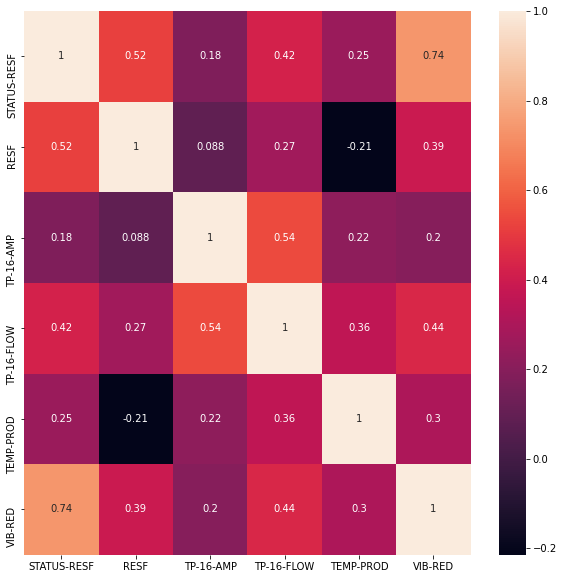

In [17]:
df_failure=df_failure.drop(['IDX'],axis=1)
corrMatrix = df_failure.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

At least, let's look at some value:

In [18]:
df_failure.head(20)

,STATUS-RESF,RESF,TP-16-AMP,TP-16-FLOW,TEMP-PROD,VIB-RED
4986,1.0,0.431435,0.080189,0.294840,0.841205,0.428739
4987,1.0,0.426317,0.117925,0.285627,0.842163,0.418182
4988,1.0,0.425037,0.080189,0.271908,0.842163,0.358944
4989,1.0,0.430955,0.080189,0.264674,0.843121,0.511437
4990,1.0,0.319151,0.080189,0.259214,0.843943,0.371848
4991,0.0,0.200256,0.202830,0.259555,0.843943,0.502639
4992,0.0,0.200256,0.160377,0.257781,0.843943,0.379472
4993,0.0,0.200309,0.117925,0.256825,0.844901,0.289736
4994,0.0,0.200256,0.283019,0.252798,0.843943,0.440469
4995,0.0,0.200203,0.283019,0.250887,0.843943,0.413490


Exporting the df to analysis:

In [19]:
df_failure.to_csv("Df_Failure.csv", index = False)

## Visual analysis of the Cooling Drum status through time

In [20]:
df_failure['IDX'] = range(1, len(df_failure) + 1)

In [21]:
import plotly.express as px

plt.figure(figsize=(40,20))
fig = px.line(df_failure.iloc[:,:5])
plt.savefig('norm_plot.jpg')
fig.show()

<Figure size 2880x1440 with 0 Axes>

By the line plot, we can deduce some points:

* The temperature, flow and current arround the cooling drum rises before a failure.
* Right before a failure, we have a spike on the cooling drum current (probably compensating for overcharge).
* The temperature drops during a failure, possibly causing a clogging.
* The input conveyor belt has little to no contribution to the problem.